## Exploratory Data Analysis: Cardiotocographic Dataset

#### Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


## Step 1: Data Cleaning and Preparation

In [3]:
# Data info
df.info()
# Check if any missing values are present
print(df.isnull().sum())
df.describe()
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Identify columns with remaining missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB 

In [4]:
## Handling Missing values
df.dropna(inplace=True)

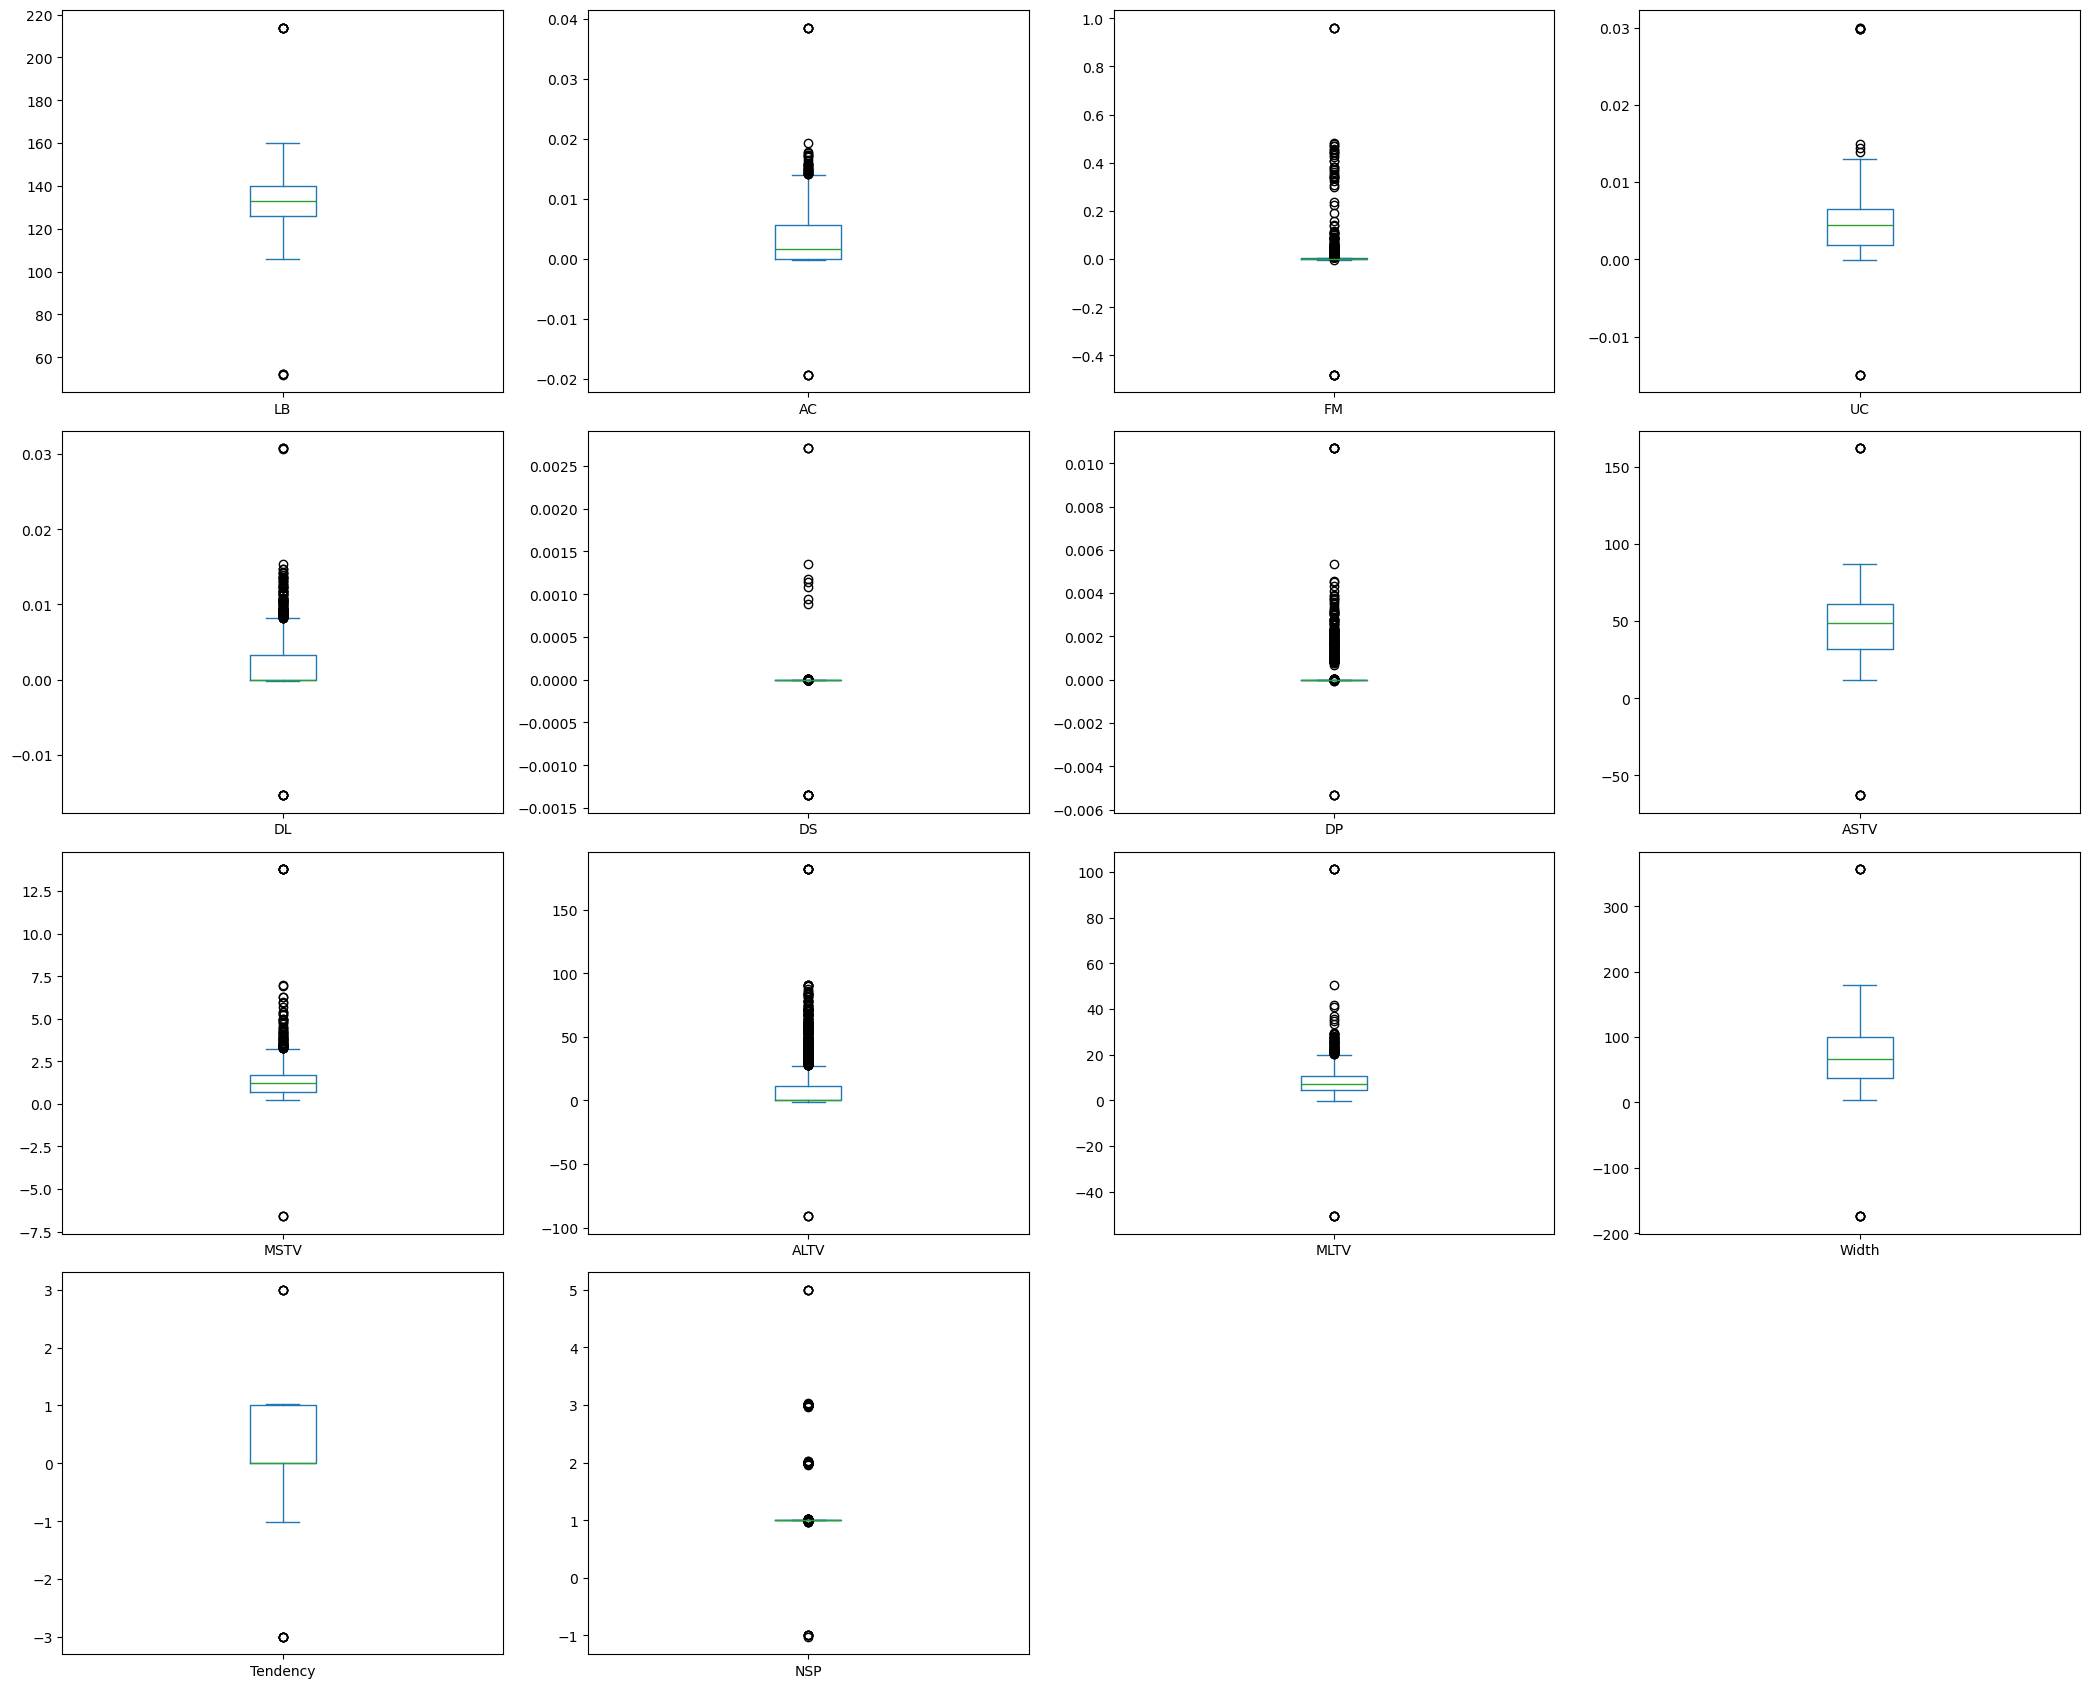

In [6]:
## Outlier Detection
# Simple Boxplots for Outlier Detection
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(21,17), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

## Step 2: Statistical Summary
Key measures of central tendency and spread for each variable.

In [7]:
summary = pd.DataFrame({
    'mean': df.mean(numeric_only=True),
    'median': df.median(numeric_only=True),
    'std': df.std(numeric_only=True),
    'iqr': df.quantile(0.75) - df.quantile(0.25)
})
summary

,mean,median,std,iqr
LB,133.343598,133.000000,11.270154,14.000000
AC,0.003202,0.001631,0.004324,0.005650
FM,0.009963,0.000000,0.067870,0.002554
UC,0.004388,0.004484,0.003350,0.004698
DL,0.001892,0.000000,0.003348,0.003289
DS,0.000003,0.000000,0.000142,0.000000
DP,0.000175,0.000000,0.000840,0.000000
ASTV,46.996929,49.000000,18.847737,29.000000
MSTV,1.361006,1.200000,1.173164,1.000000
ALTV,10.353647,0.000000,21.282102,11.000000


### Initial Findings
Highlight variables with:

- Large variation/spread in their values
- Uneven distributions
- Unusual minimum or maximum values based on the summary statistics

## Step 3: Data Visualization

Visualize distributions and relationships between variables for further understanding.

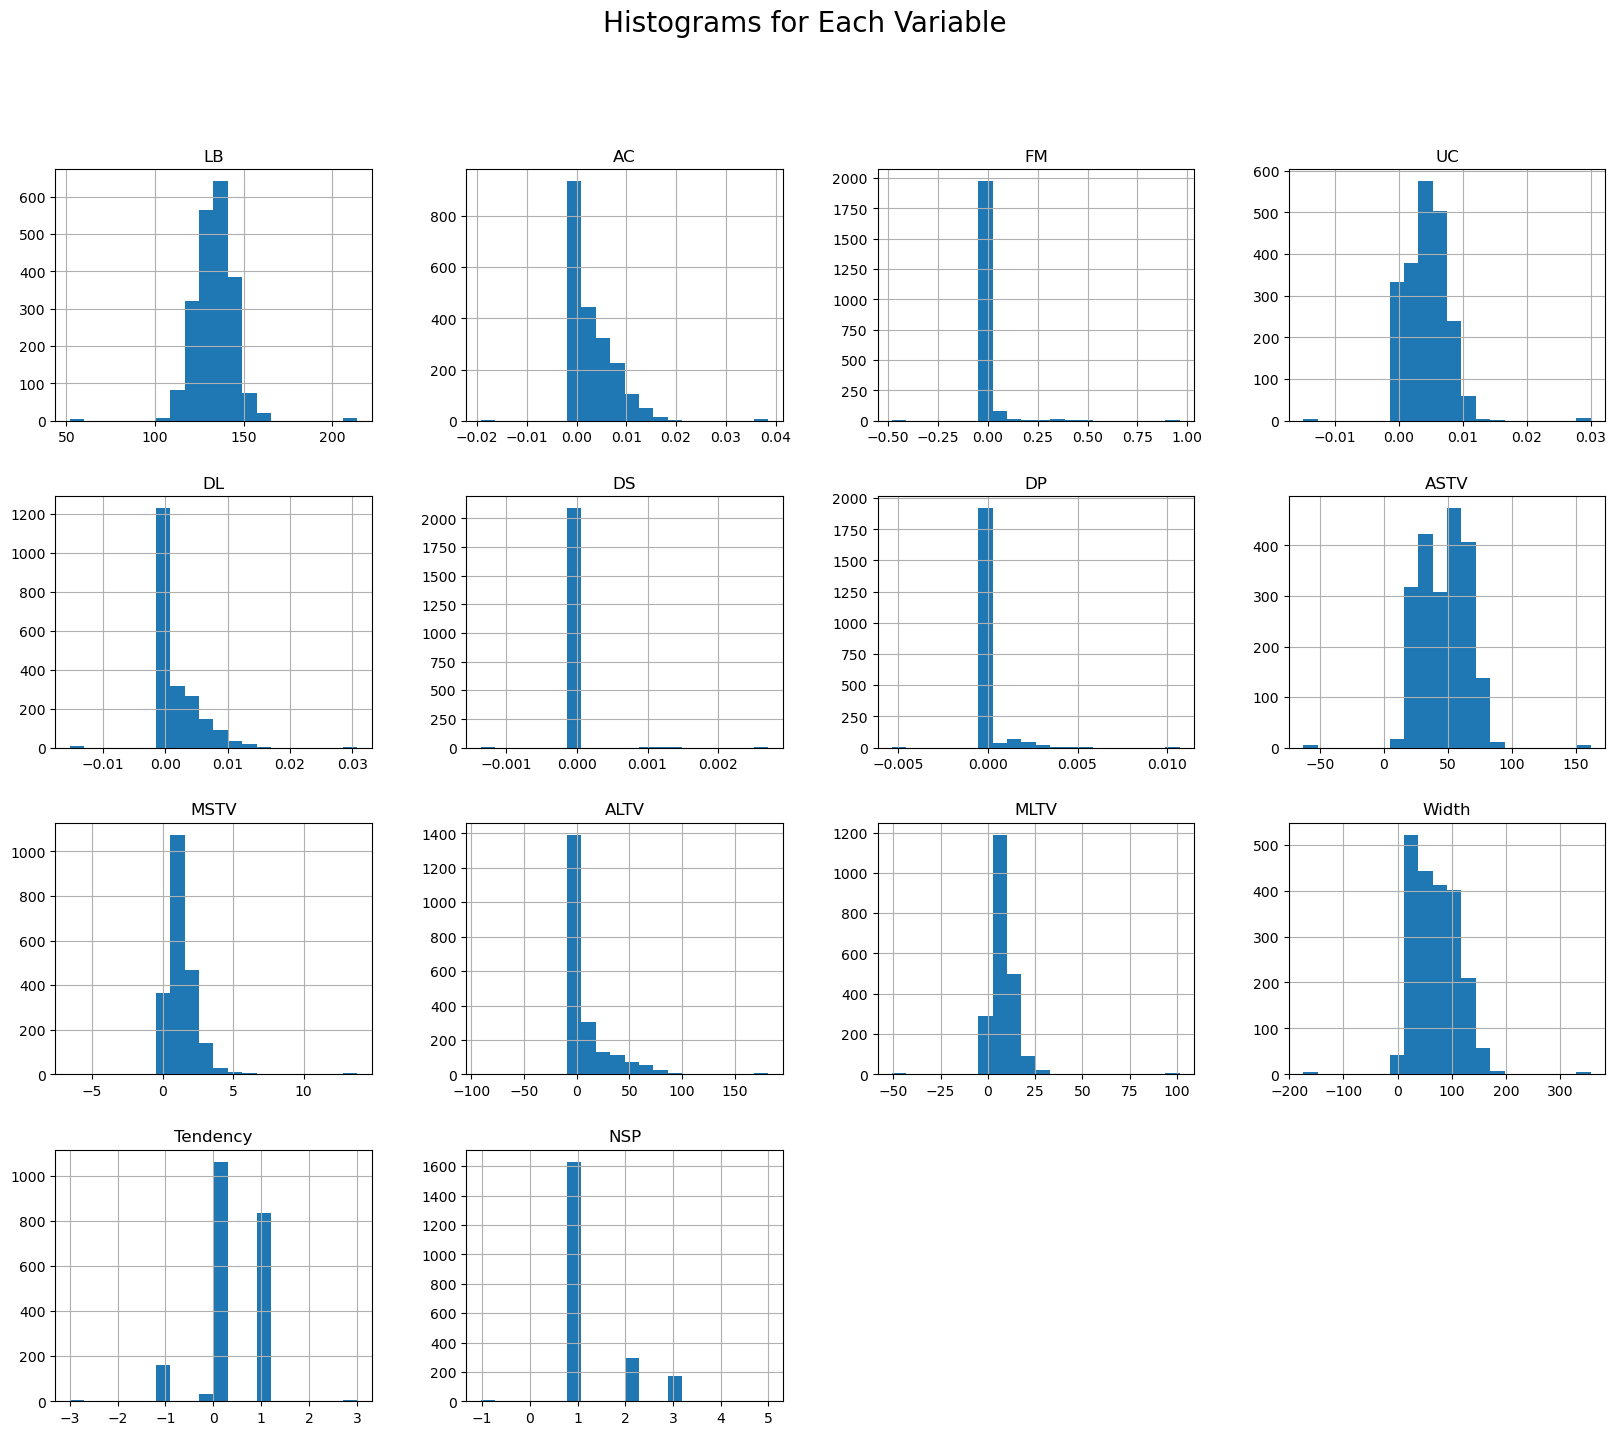

In [8]:
#  Histograms for each variable
df.hist(bins=20, figsize=(20,16))
plt.suptitle('Histograms for Each Variable', fontsize=20)
plt.show()

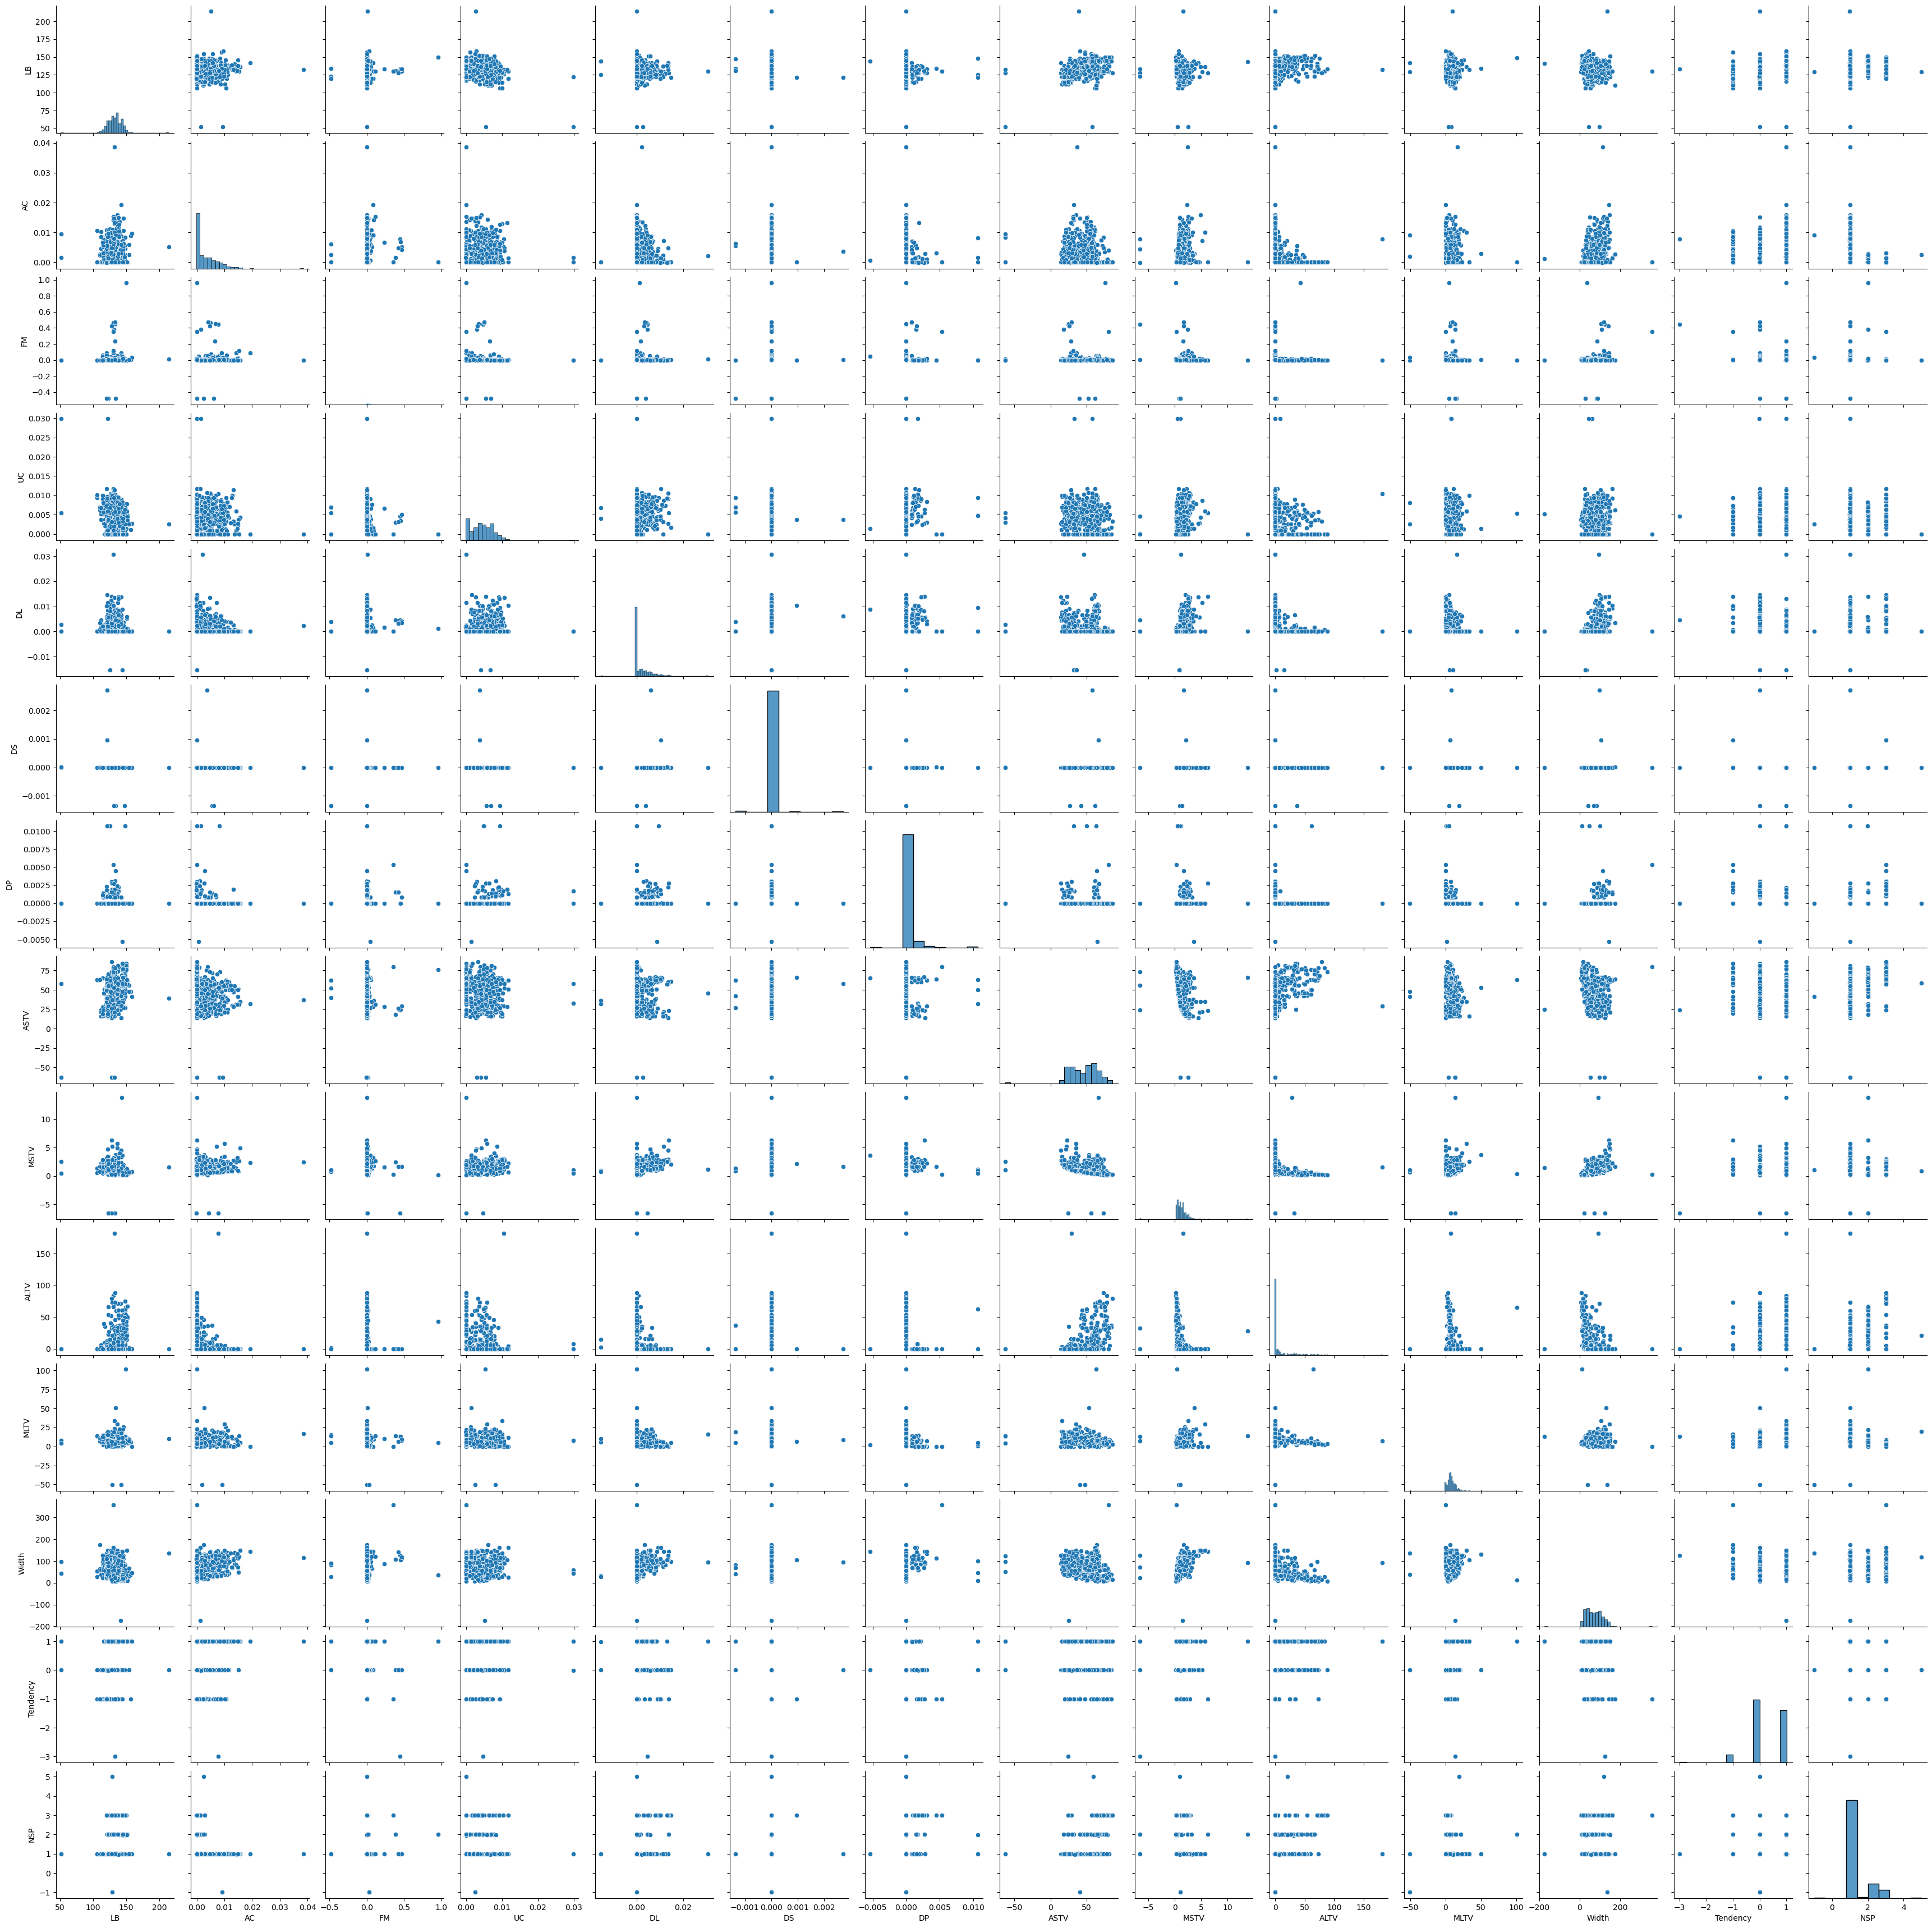

In [9]:
#  Pairplot for inter-variable relationships (if not too many vars)
sns.pairplot(df.sample(500))
plt.show()

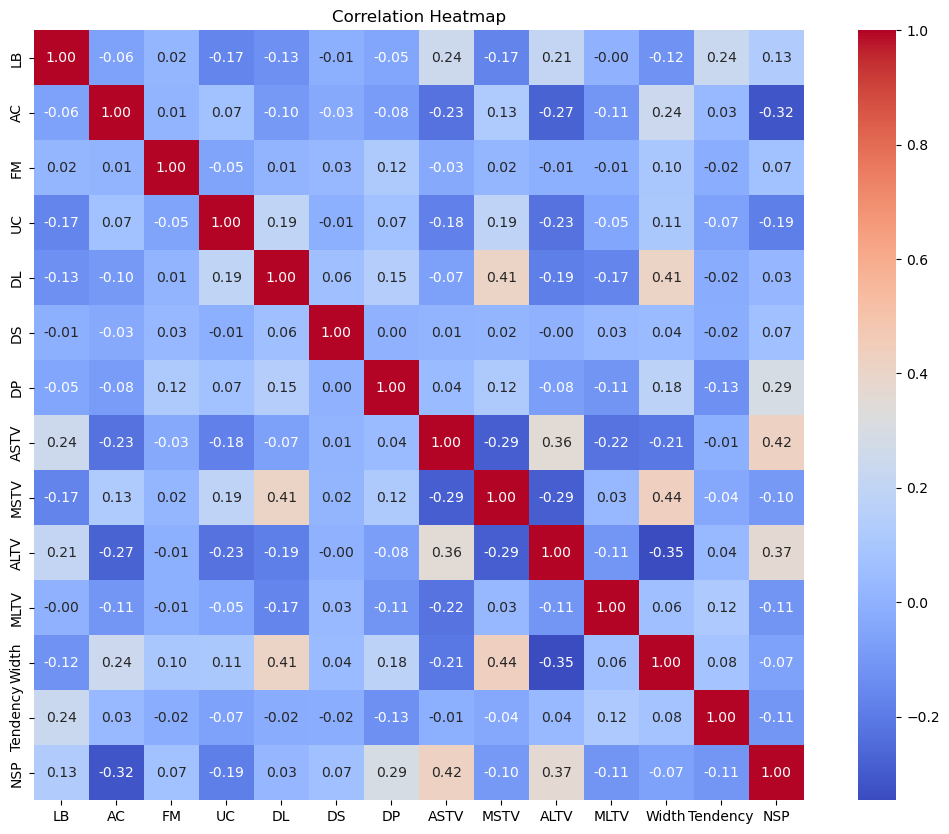

In [10]:
#  Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

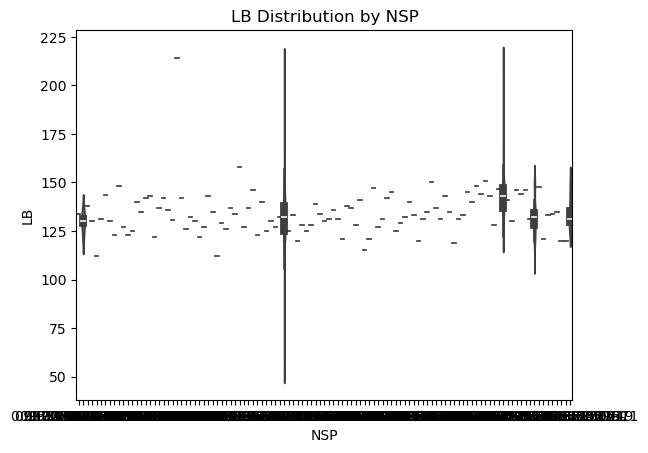

In [11]:
#  Example violin plot for one variable
sns.violinplot(data=df, x='NSP', y='LB')
plt.title('LB Distribution by NSP')
plt.show()

## Step 4: Pattern Recognition & Insights

- Discuss any strong or interesting relationships between variables,such as between fetal heart rate (LB) and uterine contractions (UC).
- Point out any clear seperation or distinction between different target or class values.
- Menttion any unusual patterns or physiological changes found in the data,if they exist.

## Step 5: Conclusion

- Summarize the key statistical results, insights, and data patterns observed.
- Discuss the relationships between different variables.
- Point out the important variables that could be useful for further modeling or prediction.
- Suggest next steps, such as feature creation or choosing suitable models, based on the EDA results.